Welcome to Search Scraper.
Use search_and_display('query') to start searching.

Starting search for: USA
Chrome driver started successfully.
Searching Wikipedia...
Searching for images...
Found 3 image URLs.
Downloaded image 1 to memory.
Downloaded image 2 to memory.
Downloaded image 3 to memory.

---------------------------------
Displaying Results for: USA
---------------------------------

Wikipedia Summary:
Title: United States
Summary: ...

Key Information:
  • Capital: Washington, D.C.
38°53′N 77°1′W
  • Largest city: New York City
40°43′N 74°0′W
  • Official languages: English[a]
  • Ethnic groups (2020)[6][7][8]: By race:
61.6% White
12.4% Black
6% Asian
1.1% Native American
0.2% Pacific Islander
10.2% two or more races
8.4% other
By origin:
81.3% non-Hispanic or Latino
18.7% Hispanic or Latino
  • Religion (2023)[9]: 67% Christianity
33% Protestantism
22% Catholicism
11% other Christian
1% Mormonism
22% unaffiliated
2% Judaism
6% other religion
3% unanswered

Images: 3 images 

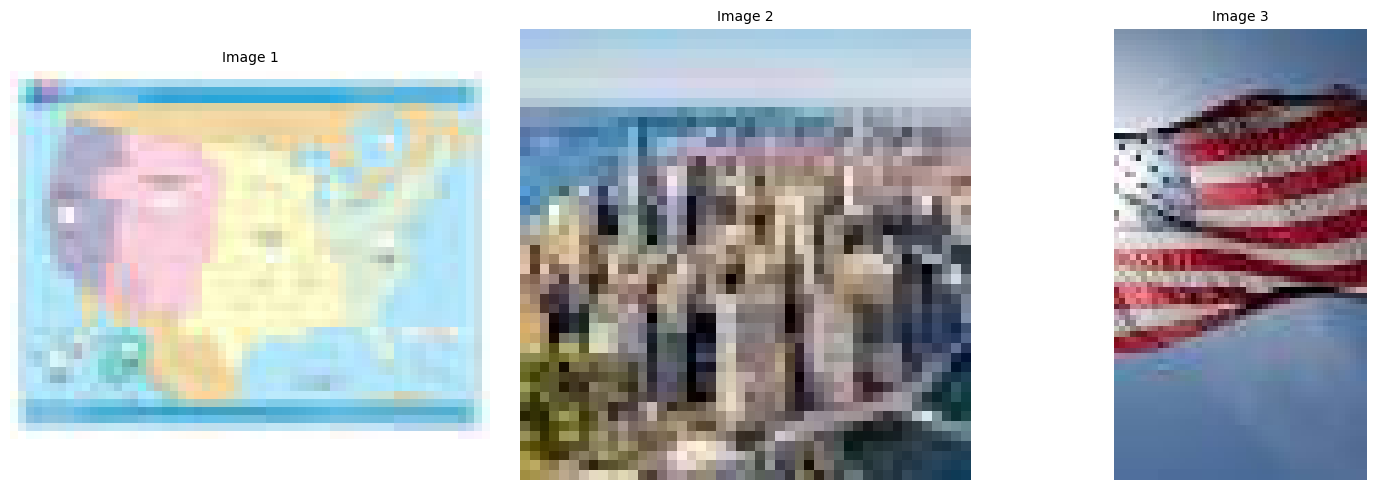


Creating visualizations for: USA


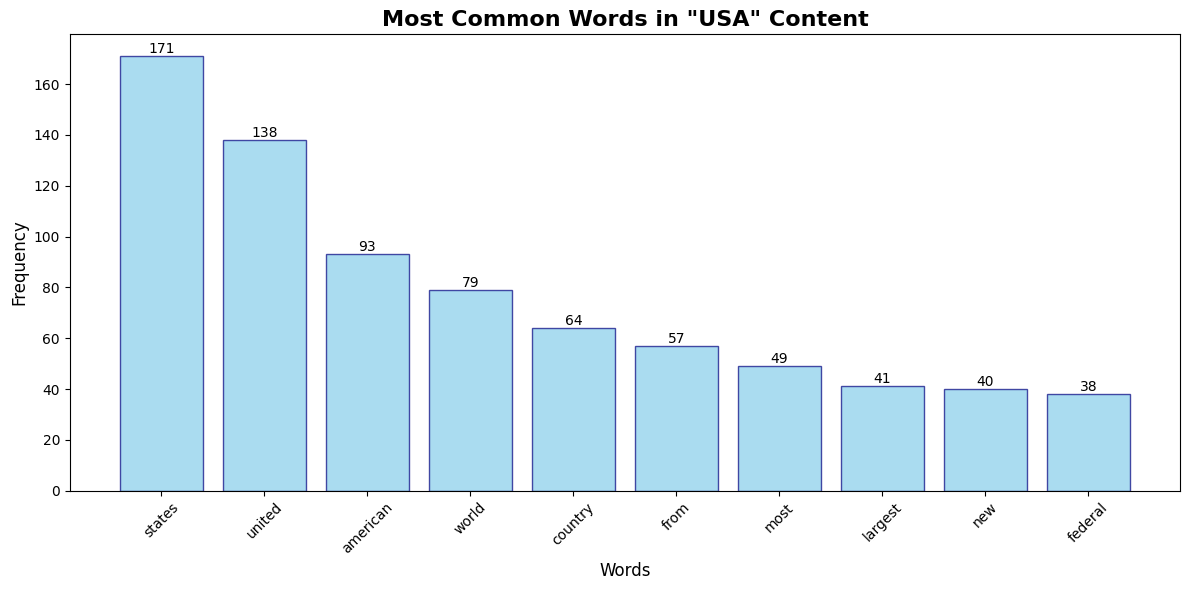

Word frequency chart displayed.


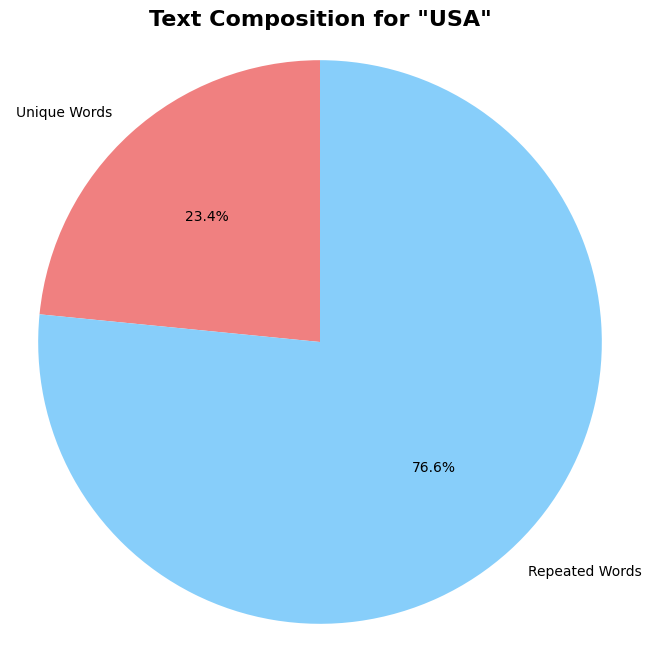

Text composition chart displayed.


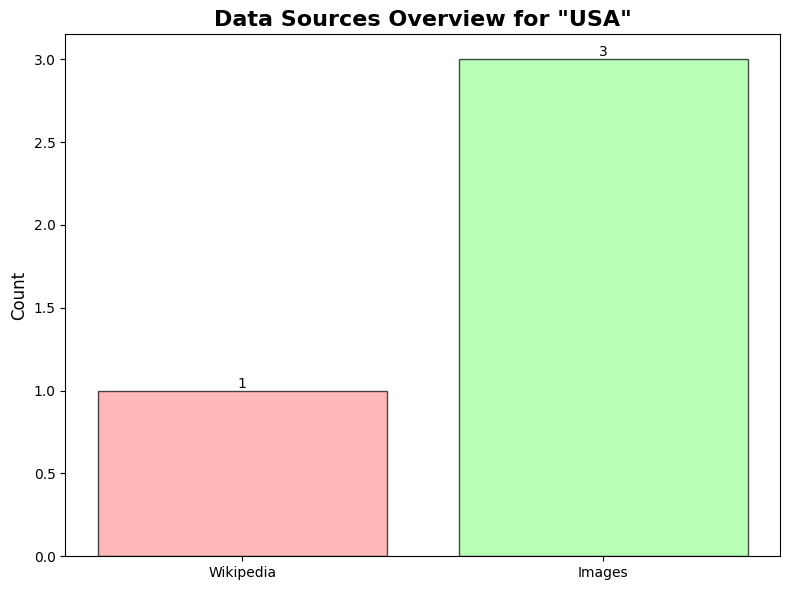

Data sources overview displayed.


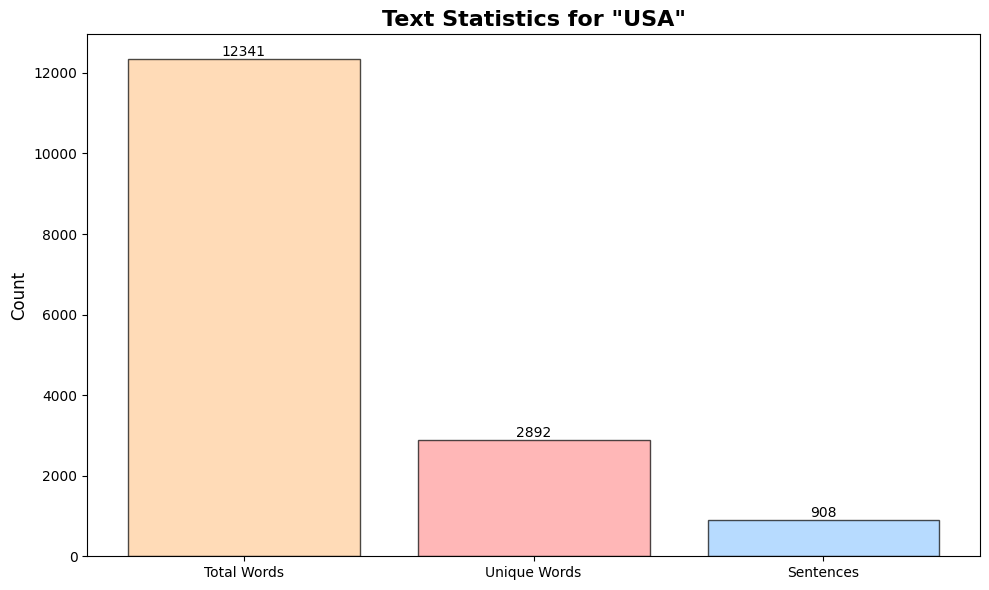

Text statistics chart displayed.

Search completed successfully.
Chrome driver closed.

Starting search for: Lamborghini Aventador
Chrome driver started successfully.
Searching Wikipedia...
Searching for images...
Found 3 image URLs.
Downloaded image 1 to memory.
Downloaded image 2 to memory.
Downloaded image 3 to memory.

---------------------------------
Displaying Results for: LAMBORGHINI AVENTADOR
---------------------------------

Wikipedia Summary:
Title: Lamborghini Aventador
Summary: ...

Key Information:
  • Manufacturer: Lamborghini
  • Production: February 2011 – September 2022
  • Model years: 2012–2022
  • Assembly: Italy: Sant'Agata Bolognese
  • Designer: Filippo Perini (original)[1][2][3]
Mitja Borkert (Aventador S)[4]

Images: 3 images downloaded to memory.

Text Analysis:
  • Total words: 3050
  • Unique words: 811
  • Sentences: 193
  • Top words: lamborghini, aventador, from, car, roadster

Search completed at: 2025-06-17 14:17:46

Displaying 3 images:


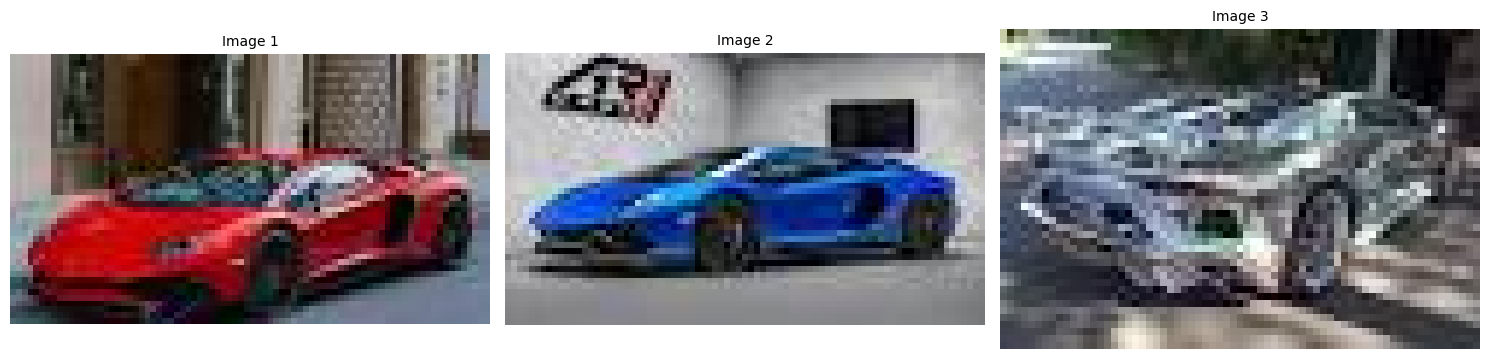


Creating visualizations for: Lamborghini Aventador


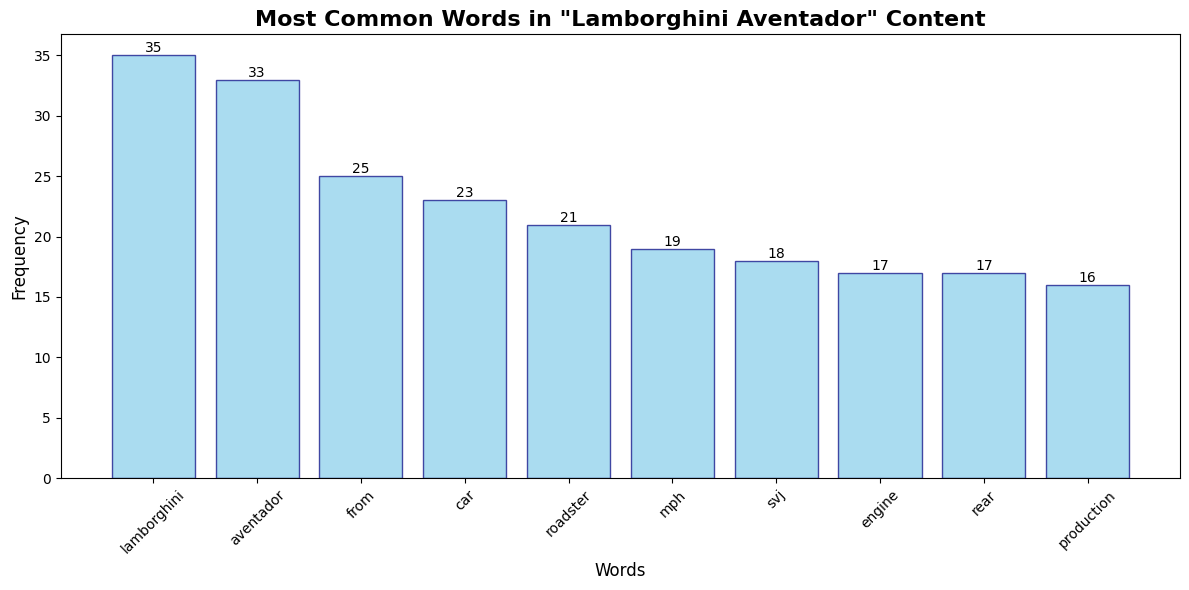

Word frequency chart displayed.


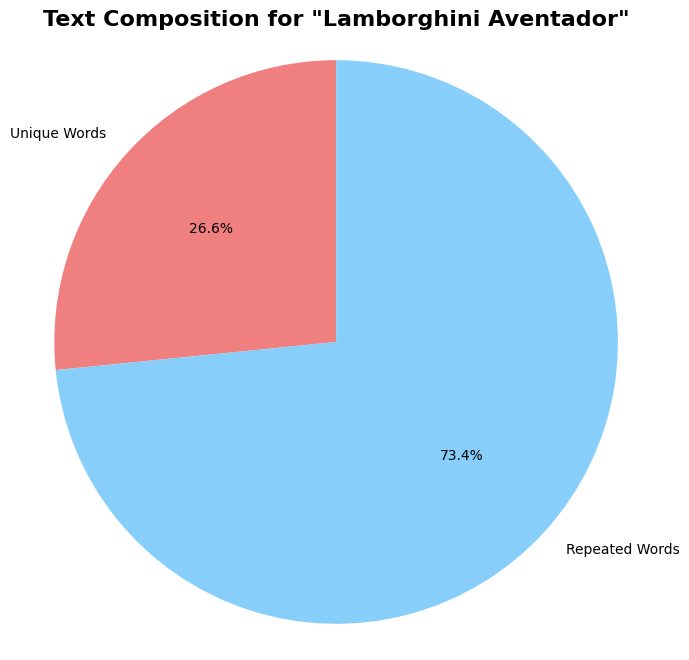

Text composition chart displayed.


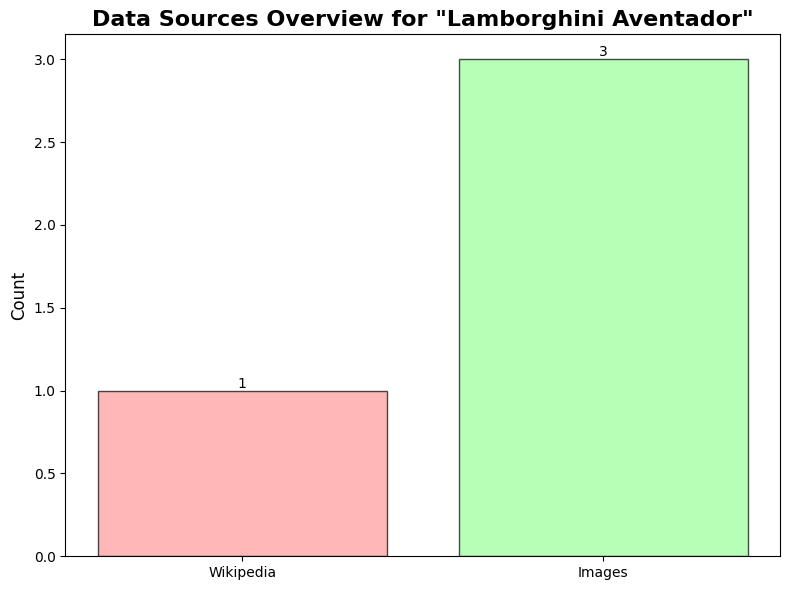

Data sources overview displayed.


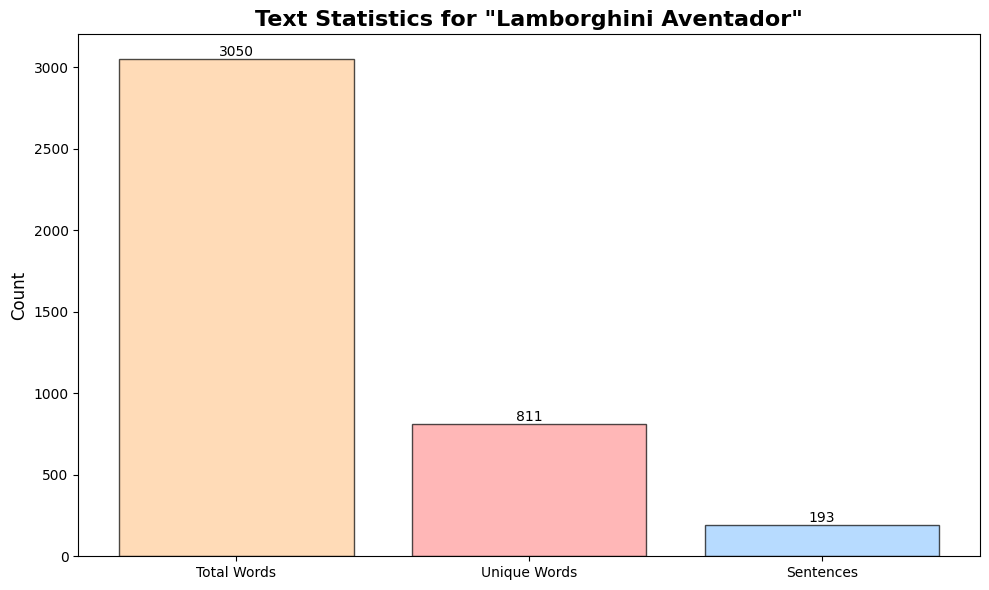

Text statistics chart displayed.

Search completed successfully.
Chrome driver closed.



{'query': 'Lamborghini Aventador',
 'wikipedia': {'title': 'Lamborghini Aventador',
  'summary': '',
  'content': '  The Lamborghini Aventador (Spanish pronunciation: [aβentaˈðoɾ]) is a mid-engine, two passenger sports car manufactured and marketed by Lamborghini from 2011 until 2022. Named after a prominent Spanish fighting bull that fought in Zaragoza, Aragón, in 1993,[10][11][12] the Aventador succeeded the Murciélago and was manufactured in Sant\'Agata Bolognese, Italy.[13] The Aventador was launched on 28 February 2011 at the Geneva Motor Show, five months after its initial unveiling in Sant\'Agata Bolognese. Internally codenamed LB834, it was designed to replace the then-decade-old Murciélago as the new flagship model.[14][15][16] Soon after its unveiling, Lamborghini announced that it had sold 12 cars, with deliveries starting in the second half of 2011.[17] By March 2016, Lamborghini had built 5,000 Aventadors. At the time, it was the second-best selling Lamborghini model ever.

In [33]:
import os
import time
import requests
import json
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import TimeoutException, NoSuchElementException
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image
import numpy as np
from collections import Counter
import re
from io import BytesIO
import base64
from IPython.display import display, HTML, Image as IPImage
class NotebookSearchScraper:
    def __init__(self, headless=True):
        self.chrome_options = Options()
        if headless:
            self.chrome_options.add_argument("--headless")
        self.chrome_options.add_argument("--no-sandbox")
        self.chrome_options.add_argument("--disable-dev-shm-usage")
        self.chrome_options.add_argument("--disable-gpu")
        self.chrome_options.add_argument("--window-size=1920,1080")
        self.driver = None
        self.scraped_data = {}
        self.images_data = [] 
    def start_driver(self):
        try:
            self.driver = webdriver.Chrome(options=self.chrome_options)
            print("Chrome driver started successfully.")
        except Exception as e:
            print(f"Error starting Chrome driver: {e}")
            return False
        return True
    def close_driver(self):
        if self.driver:
            self.driver.quit()
            print("Chrome driver closed.\n")
    def search_wikipedia(self, query):
        search_url = f"https://en.wikipedia.org/wiki/{query.replace(' ', '_')}"        
        try:
            self.driver.get(search_url)
            time.sleep(2)            
            title = self.driver.find_element(By.TAG_NAME, "h1").text            
            try:
                summary = self.driver.find_element(By.CSS_SELECTOR, ".mw-parser-output > p").text
            except NoSuchElementException:
                summary = "No summary available."            
            paragraphs = self.driver.find_elements(By.CSS_SELECTOR, ".mw-parser-output > p")
            content = " ".join([p.text for p in paragraphs])            
            infobox_data = {}
            try:
                infobox = self.driver.find_element(By.CLASS_NAME, "infobox")
                rows = infobox.find_elements(By.TAG_NAME, "tr")
                for row in rows:
                    try:
                        key = row.find_element(By.TAG_NAME, "th").text.strip()
                        value = row.find_element(By.TAG_NAME, "td").text.strip()
                        infobox_data[key] = value
                    except NoSuchElementException:
                        continue
            except NoSuchElementException:
                pass
            return {
                "title": title,
                "summary": summary,
                "content": content,
                "infobox": infobox_data,
                "url": search_url
            }
        except Exception as e:
            print(f"Error searching Wikipedia: {e}")
            return None
    def search_google_images(self, query, max_images=10):
        search_url = f"https://www.google.com/search?q={query}&tbm=isch"        
        try:
            self.driver.get(search_url)
            time.sleep(3)            
            self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
            time.sleep(2)            
            image_elements = self.driver.find_elements(By.CSS_SELECTOR, "img[data-src]")
            if not image_elements:
                image_elements = self.driver.find_elements(By.CSS_SELECTOR, "img[src]")
            image_urls = []
            for img in image_elements[:max_images]:
                try:
                    src = img.get_attribute("data-src") or img.get_attribute("src")
                    if src and src.startswith("http") and not src.startswith("data:"):
                        image_urls.append(src)
                except Exception:
                    continue
            return image_urls
        except Exception as e:
            print(f"Error searching Google Images: {e}")
            return []
    def download_images_to_memory(self, image_urls):
        images_data = []
        for i, url in enumerate(image_urls):
            try:
                headers = {
                    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36'
                }
                response = requests.get(url, timeout=10, headers=headers)
                if response.status_code == 200:
                    image_data = {
                        'url': url,
                        'data': response.content,
                        'index': i + 1
                    }
                    images_data.append(image_data)
                    print(f"Downloaded image {i+1} to memory.")
            except Exception as e:
                print(f"Error downloading image {i+1}: {e}")
        return images_data
    def display_images_inline(self, images_data, max_display=6):
        if not images_data:
            print("No images to display.")
            return
        print(f"\nDisplaying {min(len(images_data), max_display)} images:")        
        cols = 3
        rows = (min(len(images_data), max_display) + cols - 1) // cols
        fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
        if rows == 1:
            axes = [axes] if cols == 1 else axes
        else:
            axes = axes.flatten()
        for i, img_data in enumerate(images_data[:max_display]):
            try:
                image = Image.open(BytesIO(img_data['data']))
                if image.mode != 'RGB':
                    image = image.convert('RGB')
                axes[i].imshow(image)
                axes[i].set_title(f"Image {img_data['index']}", fontsize=10)
                axes[i].axis('off')
            except Exception as e:
                axes[i].text(0.5, 0.5, f"Error loading\nimage {i+1}", 
                           ha='center', va='center', transform=axes[i].transAxes)
                axes[i].axis('off')        
        for i in range(len(images_data), len(axes)):
            axes[i].axis('off')
        plt.tight_layout()
        plt.show()
    def analyze_text_simple(self, text):
        if not text:
            return {}        
        text_lower = text.lower()
        words = re.findall(r'\b[a-zA-Z]+\b', text_lower)        
        stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 
                      'by', 'is', 'are', 'was', 'were', 'been', 'be', 'have', 'has', 'had', 'do', 'does', 
                      'did', 'will', 'would', 'could', 'should', 'may', 'might', 'must', 'shall', 'can', 
                      'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 
                      'him', 'her', 'us', 'them', 'my', 'your', 'his', 'her', 'its', 'our', 'their'}
        filtered_words = [word for word in words if word not in stop_words and len(word) > 2]        
        word_freq = Counter(filtered_words)        
        sentences = text.split('.')
        return {
            "total_words": len(words),
            "unique_words": len(set(filtered_words)),
            "sentences": len([s for s in sentences if s.strip()]),
            "most_common_words": word_freq.most_common(10)
        }
    def create_visualizations_inline(self, query, data):
        print(f"\nCreating visualizations for: {query}")
        plt.style.use('default')        
        if 'wikipedia' in data and data['wikipedia']:
            text_stats = self.analyze_text_simple(data['wikipedia']['content'])
            if text_stats.get('most_common_words'):
                words, counts = zip(*text_stats['most_common_words'])
                plt.figure(figsize=(12, 6))
                bars = plt.bar(words, counts, color='skyblue', edgecolor='navy', alpha=0.7)
                plt.title(f'Most Common Words in "{query}" Content', fontsize=16, fontweight='bold')
                plt.xlabel('Words', fontsize=12)
                plt.ylabel('Frequency', fontsize=12)
                plt.xticks(rotation=45)                
                for bar in bars:
                    height = bar.get_height()
                    plt.text(bar.get_x() + bar.get_width()/2., height,
                            f'{int(height)}', ha='center', va='bottom')
                plt.tight_layout()
                plt.show()
                print("Word frequency chart displayed.")        
        if 'wikipedia' in data and data['wikipedia']:
            stats = self.analyze_text_simple(data['wikipedia']['content'])
            if stats['total_words'] > 0:
                labels = ['Unique Words', 'Repeated Words']
                sizes = [stats['unique_words'], max(0, stats['total_words'] - stats['unique_words'])]
                colors = ['lightcoral', 'lightskyblue']
                plt.figure(figsize=(8, 8))
                plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
                plt.title(f'Text Composition for "{query}"', fontsize=16, fontweight='bold')
                plt.axis('equal')
                plt.show()
                print("Text composition chart displayed.")        
        source_counts = {}
        if 'wikipedia' in data and data['wikipedia']:
            source_counts['Wikipedia'] = 1
        if 'images' in data and data['images']:
            source_counts['Images'] = len(data['images'])
        if source_counts:
            plt.figure(figsize=(8, 6))
            bars = plt.bar(source_counts.keys(), source_counts.values(), 
                          color=['#ff9999', '#99ff99'], 
                          edgecolor='black', alpha=0.7)
            plt.title(f'Data Sources Overview for "{query}"', fontsize=16, fontweight='bold')
            plt.ylabel('Count', fontsize=12)
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height)}', ha='center', va='bottom')
            plt.tight_layout()
            plt.show()
            print("Data sources overview displayed.")        
        if 'wikipedia' in data and data['wikipedia']:
            stats = self.analyze_text_simple(data['wikipedia']['content'])
            if stats:
                categories = ['Total Words', 'Unique Words', 'Sentences']
                values = [stats['total_words'], stats['unique_words'], stats['sentences']]
                plt.figure(figsize=(10, 6))
                bars = plt.bar(categories, values, color=['#ffcc99', '#ff9999', '#99ccff'], 
                              edgecolor='black', alpha=0.7)
                plt.title(f'Text Statistics for "{query}"', fontsize=16, fontweight='bold')
                plt.ylabel('Count', fontsize=12)
                for bar in bars:
                    height = bar.get_height()
                    plt.text(bar.get_x() + bar.get_width()/2., height,
                            f'{int(height)}', ha='center', va='bottom')
                plt.tight_layout()
                plt.show()
                print("Text statistics chart displayed.")    
    def comprehensive_search(self, query):
        print(f"Starting search for: {query}")
        if not self.start_driver():
            return None        
        try:
            print("Searching Wikipedia...")
            wikipedia_data = self.search_wikipedia(query)            
            print("Searching for images...")
            image_urls = self.search_google_images(query, max_images=8)
            print(f"Found {len(image_urls)} image URLs.")
            images_data = self.download_images_to_memory(image_urls)            
            all_data = {
                "query": query,
                "wikipedia": wikipedia_data,
                "images": images_data,
                "timestamp": time.strftime("%Y-%m-%d %H:%M:%S")
            }
            print("\n---------------------------------")
            print(f"Displaying Results for: {query.upper()}")
            print("---------------------------------")
            self.display_results_inline(all_data)            
            if images_data:
                self.display_images_inline(images_data)            
            self.create_visualizations_inline(query, all_data)
            print("\nSearch completed successfully.")
            return all_data
        except Exception as e:
            print(f"Error during comprehensive search: {e}")
            import traceback
            traceback.print_exc()
            return None
        finally:
            self.close_driver()    
    def display_results_inline(self, data):
        if not data:
            print("No data to display.")
            return
        query = data['query']        
        if data.get('wikipedia'):
            wiki = data['wikipedia']
            print(f"\nWikipedia Summary:")
            print(f"Title: {wiki['title']}")
            print(f"Summary: {wiki['summary'][:400]}...")
            if wiki.get('infobox'):
                print(f"\nKey Information:")
                for key, value in list(wiki['infobox'].items())[:5]:
                    print(f"  • {key}: {value}")        
        if data.get('images'):
            print(f"\nImages: {len(data['images'])} images downloaded to memory.")        
        if data.get('wikipedia'):
            stats = self.analyze_text_simple(data['wikipedia']['content'])
            if stats:
                print(f"\nText Analysis:")
                print(f"  • Total words: {stats['total_words']}")
                print(f"  • Unique words: {stats['unique_words']}")
                print(f"  • Sentences: {stats['sentences']}")
                if stats.get('most_common_words'):
                    print(f"  • Top words: {', '.join([word for word, _ in stats['most_common_words'][:5]])}")
        print(f"\nSearch completed at: {data['timestamp']}")
def search_and_display(query, headless=True):
    scraper = NotebookSearchScraper(headless=headless)
    return scraper.comprehensive_search(query)
print("Welcome to Search Scraper.")
print("Use search_and_display('query') to start searching.\n")

# Examples:
search_and_display("USA")
search_and_display("Lamborghini Aventador")